# Diabetes Predictor
**Write background on the purpose and mission of this file**: 


## Imports

In [38]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, ConfusionMatrixDisplay, precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

## Read CSV File

In [39]:
df = pd.read_csv('diabetes.csv')
# remove diabetes from category dataframe
cat_df = df.drop(columns=['diabetes'])
df.dtypes
print(df['diabetes'])

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


## Chi Squared Test

In [40]:
chi_results = {}
#
# iterate through the columns of all potential feature variables
for column in cat_df.columns:
    contingency_table = pd.crosstab(cat_df[column],  df['diabetes'])
    # gather results such as chi squared, p value, etc
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # store the results in the dictionary
    chi_results[column] = {'Chi-Squared': chi2, 'p-value': p, 'Degrees of Freedom': dof}

# Print the results
for column, result in chi_results.items():
    print(f"Chi-Squared Test for {column}:")
    print(f"Chi-Squared Value: {result['Chi-Squared']}")
    print(f"P-value: {result['p-value']}")
    print(f"Degrees of Freedom: {result['Degrees of Freedom']}\n")

Chi-Squared Test for gender:
Chi-Squared Value: 143.21825102550298
P-value: 7.953383718307459e-32
Degrees of Freedom: 2

Chi-Squared Test for age:
Chi-Squared Value: 7585.387570077656
P-value: 0.0
Degrees of Freedom: 101

Chi-Squared Test for hypertension:
Chi-Squared Value: 3910.708546826595
P-value: 0.0
Degrees of Freedom: 1

Chi-Squared Test for heart_disease:
Chi-Squared Value: 2945.847521829186
P-value: 0.0
Degrees of Freedom: 1

Chi-Squared Test for smoking_history:
Chi-Squared Value: 1956.0944200848764
P-value: 0.0
Degrees of Freedom: 5

Chi-Squared Test for bmi:
Chi-Squared Value: 11474.107609175324
P-value: 0.0
Degrees of Freedom: 4246

Chi-Squared Test for HbA1c_level:
Chi-Squared Value: 45478.21652874937
P-value: 0.0
Degrees of Freedom: 17

Chi-Squared Test for blood_glucose_level:
Chi-Squared Value: 38553.21026345405
P-value: 0.0
Degrees of Freedom: 17



## Correlation Matrix

In [41]:
# Encode categorical data
print(df.dtypes)
print(df.head(10))
df['gender'] = label_encoder.fit_transform(df['gender']) 
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history']) 
df.head(20)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   
5  Female  20.0             0              0           never  27.32   
6  Female  44.0             0              0           never  19.31   
7  Female  79.0             0              0         No Info  23.86   
8    Male  42.0             0              0           never  33.64 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0


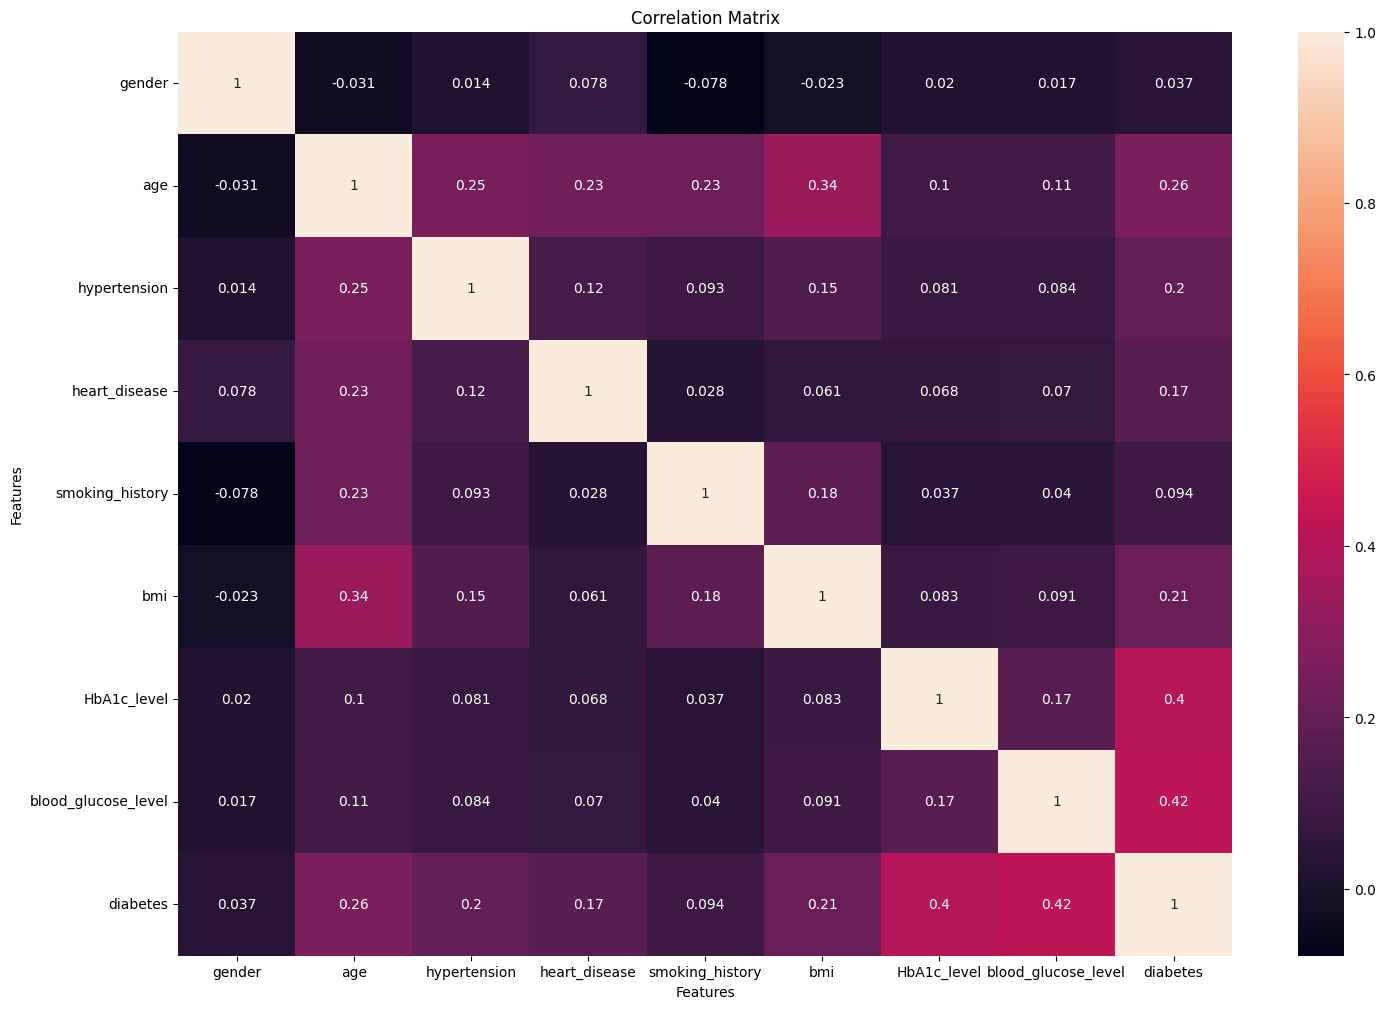

In [42]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

# Paritioning data into Train and Test

In [43]:
#predict the winner of the race 
X = df.drop(columns=['diabetes'])
y = df.diabetes
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# KNN (K-Nearest Neighbors)

In [44]:
predictions = {}
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    #target is multiclass so we need to use an average metric for precision and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    predictions[i] = accuracy


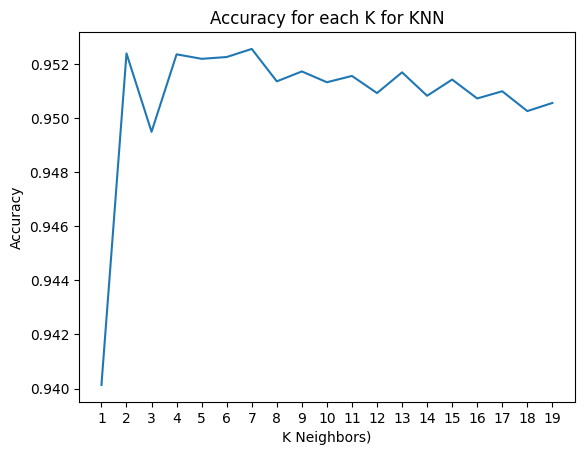

In [45]:
sns.lineplot(x=predictions.keys(), y=predictions.values())
plt.xticks(range(min(predictions.keys()), max(predictions.keys()) + 1))
plt.xlabel("K Neighbors)")
plt.ylabel("Accuracy")
plt.title("Accuracy for each K for KNN")
plt.show()

In [46]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
new_row = np.array([1,42.0,0,0,4,33.64,4.8,145
]).reshape(1, -1)
predicted_target = knn.predict(new_row)

print(f"The predicted target variable for the new row is: {predicted_target[0]}")

KNN Accuracy: 0.9505666666666667
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27453
           1       0.96      0.43      0.60      2547

    accuracy                           0.95     30000
   macro avg       0.96      0.72      0.79     30000
weighted avg       0.95      0.95      0.94     30000

The predicted target variable for the new row is: 0


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Naive Bayes Classification

In [47]:
model = GaussianNB()
mod = model.fit(X_train, y_train)
y_pred = mod.predict(X_test)
predicted_target = model.predict(new_row)
print(f"The predicted target variable for the new row is: {predicted_target[0]}")
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

The predicted target variable for the new row is: 0
KNN Accuracy: 0.9059666666666667
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     27453
           1       0.46      0.65      0.54      2547

    accuracy                           0.91     30000
   macro avg       0.71      0.79      0.74     30000
weighted avg       0.92      0.91      0.91     30000



/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
